# Fix this EPR (Energy Participation ratio) Analysis bug in Ansys and you get a price.

Superconducting microwave circuits incorporating nonlinear devices, such as Josephson junctions, are a leading platform for emerging quantum technologies. Increasing circuit complexity further requires efficient methods for the calculation and optimization of the spectrum, nonlinear interactions, and dissipation in multi-mode distributed quantum circuits. 
The EPR, a number between zero and one, quantifies how much of the mode energy is stored in each element. The EPRs obey universal constraints and are calculated from one electromagnetic-eigenmode simulation. They lead directly to the system quantum Hamiltonian and dissipative parameters. The method provides an intuitive and simple-to-use tool to quantize multi-junction circuits.

See https://www.nature.com/articles/s41534-021-00461-8.pdf

Requirements:
* Python 3.8+
* Qiskit Metal: https://qiskit-community.github.io/qiskit-metal/
* Ansys Electronics desktop: https://www.lib.ncsu.edu/software

# Import required libs

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.analyses.quantization import EPRanalysis

In [3]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'

gui = MetalGUI(design)


q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um',
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

# This will spawn the metal GUI
gui.rebuild()
gui.autoscale()

## EPR (Energy Participation Ratio) Analisys Bug


In [4]:
eig_qb = EPRanalysis(design, "hfss")

# example: update single setting
eig_qb.sim.setup.max_passes = 6
eig_qb.sim.setup.vars.Lj = '11 nH'
# example: update multiple settings
eig_qb.sim.setup_update(max_delta_f = 0.4, min_freq_ghz = 1.1)

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1.1,
 'n_modes': 1,
 'max_delta_f': 0.4,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '11 nH', 'Cj': '0 fF'}}

## Run the analisys

In [5]:
eig_qb.sim.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)
#eig_qb.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)

# Print convergences in metal
eig_qb.sim.plot_convergences()

INFO 08:06PM [connect_project]: Connecting to Ansys Desktop API...
INFO 08:06PM [load_ansys_project]: 	Opened Ansys App
INFO 08:06PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 08:06PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/vsilva/Documents/Ansoft/
	Project:   Project2
INFO 08:06PM [connect_design]: No active design found (or error getting active design).
INFO 08:06PM [connect]: 	 Connected to project "Project2". No design detected
INFO 08:06PM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
WARNING 08:06PM [connect_setup]: 	No design setup detected.
WARNING 08:06PM [connect_setup]: 	Creating eigenmode default setup.
INFO 08:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:06PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:06PM [analyze]: Analyzing setup Setup
08:06PM 59s INFO [get_f_convergence]: Saved convergences to C:\Users\vsilva\D

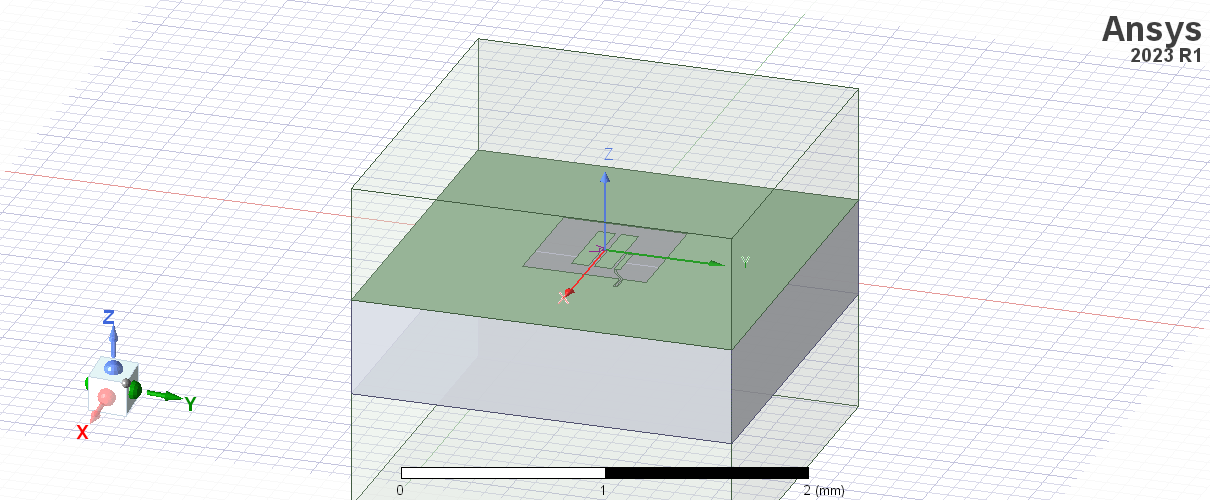

WindowsPath('C:/Users/vsilva/Documents/NCSU/etc/Hackathons/ansys.png')

In [6]:
# Capture the render gui
eig_qb.sim.save_screenshot()

## Run EPR Analysis

The EPR, a number between zero and one, quantifies how much of the mode energy is stored in each element. The EPRs obey universal constraints and are calculated from one electromagnetic-eigenmode simulation. They lead directly to the system quantum Hamiltonian and dissipative parameters.

For details, see https://research.ibm.com/publications/energy-participation-quantization-of-josephson-circuits

Identify the non-linear (Josephson) junctions in the model

In [7]:
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

## Run EPR. Can you fix the bug? If so you win a prize!

In [8]:
eig_qb.run_epr()

#### equivalent individual calls
# s = self.setup
# self.epr_start()
# eig_qb.get_stored_energy()
# eig_qb.run_analysis()
# eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc)
# eig_qb.report_hamiltonian(s.swp_variable)

Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 5.71812651841726e-24
        energy_elec_substrate = 5.26162469503819e-24
        EPR of substrate = 92.0%

        energy_mag    = 2.97482717263897e-26
        energy_mag % of energy_elec_all  = 0.5%
        

Variation 0  [1/1]

  Mode 0 at 6.23 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  2.859e-24 1.487e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.74%
	jj              0.903836  (+)        0.0304283
		(U_tot_cap-U_tot_ind)/mean=6.26%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9201658406982175


INFO 08:10PM [hfss_report_f_convergence]: Curves Set Attribute Line Width (vsilva) ['Freq. vs. pass:re(Mode(1)):Curve1'] Setup fields: <pyEPR.ansys.HfssFieldsCalc object at 0x000002BA292B7FA0>


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024382), None)

## Cleanup

Must close Ansys and metal

In [9]:
# Ansys
eig_qb.sim.close()

# Metal
gui.main_window.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


True